In [21]:
#MULTIPLE LINEAR REGRESSION
#HEIGHT PREDICTION 

In [22]:
import numpy as np
import pandas as pd
import seaborn as sbn

In [23]:
data=pd.read_csv("veriler.csv")
df=data.copy()
df

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


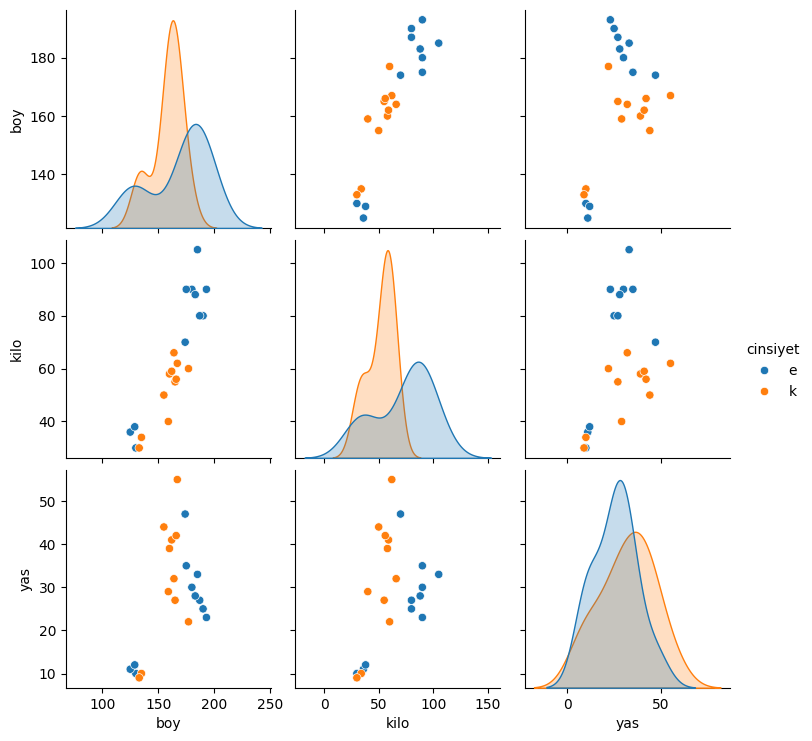

In [24]:
#lets learn the relationship between columns
sbn.pairplot(df,hue="cinsiyet")

In [29]:
#lets encode cinsiyet column
#label encoder


from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df["cinsiyet"]=le.fit_transform(df["cinsiyet"])
df.rename(columns={"cinsiyet":"isWoman"},inplace=True)
df

,ulke,boy,kilo,yas,isWoman
0,tr,130,30,10,0
1,tr,125,36,11,0
2,tr,135,34,10,1
3,tr,133,30,9,1
4,tr,129,38,12,0
5,tr,180,90,30,0
6,tr,190,80,25,0
7,tr,175,90,35,0
8,tr,177,60,22,1
9,us,185,105,33,0


In [31]:
#lets encode ulke column
#one hot encoder

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")

encoded_data=ohe.fit_transform(df[["ulke"]])
encoded_data

,ulke_fr,ulke_tr,ulke_us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [32]:
#lets concat and drop dummy variables

df=pd.concat([df,encoded_data],axis=1).drop(columns=["ulke","ulke_us"])
df

,boy,kilo,yas,isWoman,ulke_fr,ulke_tr
0,130,30,10,0,0.0,1.0
1,125,36,11,0,0.0,1.0
2,135,34,10,1,0.0,1.0
3,133,30,9,1,0.0,1.0
4,129,38,12,0,0.0,1.0
5,180,90,30,0,0.0,1.0
6,190,80,25,0,0.0,1.0
7,175,90,35,0,0.0,1.0
8,177,60,22,1,0.0,1.0
9,185,105,33,0,0.0,0.0


In [34]:
#now all data is numerical
#split model as x y
#predict boy

x=df.iloc[:,1:]
x

,kilo,yas,isWoman,ulke_fr,ulke_tr
0,30,10,0,0.0,1.0
1,36,11,0,0.0,1.0
2,34,10,1,0.0,1.0
3,30,9,1,0.0,1.0
4,38,12,0,0.0,1.0
5,90,30,0,0.0,1.0
6,80,25,0,0.0,1.0
7,90,35,0,0.0,1.0
8,60,22,1,0.0,1.0
9,105,33,0,0.0,0.0


In [35]:
y=df.iloc[:,0]
y

0     130
1     125
2     135
3     133
4     129
5     180
6     190
7     175
8     177
9     185
10    165
11    155
12    160
13    162
14    167
15    174
16    193
17    187
18    183
19    159
20    164
21    166
Name: boy, dtype: int64

In [36]:
#train model


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [37]:
x_train

,kilo,yas,isWoman,ulke_fr,ulke_tr
8,60,22,1,0.0,1.0
6,80,25,0,0.0,1.0
16,90,23,0,1.0,0.0
4,38,12,0,0.0,1.0
2,34,10,1,0.0,1.0
5,90,30,0,0.0,1.0
17,80,27,0,1.0,0.0
9,105,33,0,0.0,0.0
7,90,35,0,0.0,1.0
18,88,28,0,1.0,0.0


In [38]:
y_train

8     177
6     190
16    193
4     129
2     135
5     180
17    187
9     185
7     175
18    183
3     133
0     130
15    174
12    160
Name: boy, dtype: int64

In [39]:
x_test

,kilo,yas,isWoman,ulke_fr,ulke_tr
20,66,32,1,1.0,0.0
10,55,27,1,0.0,0.0
14,62,55,1,0.0,0.0
13,59,41,1,0.0,0.0
1,36,11,0,0.0,1.0
21,56,42,1,1.0,0.0
11,50,44,1,0.0,0.0
19,40,29,1,1.0,0.0


In [40]:
y_test

20    164
10    165
14    167
13    162
1     125
21    166
11    155
19    159
Name: boy, dtype: int64

In [42]:
#multiple linear regression

from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

linear_reg.fit(x_train,y_train)

y_predicted=linear_reg.predict(x_test)
y_predicted

array([182.26638686, 152.87161474, 162.79386375, 158.30668577,
       130.82888952, 173.96138408, 150.12782663, 157.26898922])

In [43]:
y_test

20    164
10    165
14    167
13    162
1     125
21    166
11    155
19    159
Name: boy, dtype: int64

In [44]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predicted)

0.5269561623575586